# Projet Machine Learning - Ecole Centrale Casablanca - Janvier 2024



Membre de groupe :

#### ZAOUG Imad
#### KHAZNAOUI Mouad
#### DIDI Houssam
#### SOUFIANE Mehdi
#### BENTAHER Saad

## Imports

In [ ]:
!pip install beautifultable
!pip install six
!pip install pydotplus
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 7.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=3af8daabd385bd67b541a2560f7fde647431f567de219a559e897587be26e41c
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [ ]:
# Pour la manipulation des données
import pandas as pd
import numpy as np
# Package de visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
# from ggplot import *
from beautifultable import BeautifulTable
# Ignorer les avertissements
import warnings
# pour le feature engineering
import time
import datetime
import scipy.stats
# Pour la division des ensembles de données d'entraînement et de test
from sklearn.model_selection import train_test_split

# Pour la recherche par grille
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# les mesures d'évaluation
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from pylab import rcParams

# Pour la comparaison des modèles
from sklearn import metrics
# Pour le modèle d'arbre de décision
from sklearn import tree

# Pour la visualisation de l'arbre de décision
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Pour le boosting de gradient
from sklearn.ensemble import GradientBoostingClassifier

# Pour la recherche aléatoire
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

----
## 1 Prétraitement des données
----

### 1.1 Chargement et Jointure des Données

In [ ]:
# Chargement des données initiales (Veuillez modifier le lien si vous souhaitez tester le code avec celui correspondant à l'emplacement des fichiers sur votre machine)
bids = pd.read_csv("/kaggle/input/machine-learning-dataset/Projet_ML/Copie de bids.csv")
train = pd.read_csv("/kaggle/input/machine-learning-dataset/Projet_ML/Copie de train.csv")

In [ ]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [ ]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


Les ensembles de données sont fournis en deux parties :
* `train.csv` : l'ensemble de données de base des enchérisseurs avec des étiquettes. Outre l'étiquette, il contient également des identifiants uniques `bidder_id` suivis de `payment_account`, `address` et `outcome`.
* `bids.csv` : l'ensemble de données contient des informations supplémentaires associées à la clé unique `bid_id`, correspondant à `bidder_id`, `auction`, `merchandise`, `device`, `time`, `country`, `ip` et `url`. `time` et `url` sont des informations cryptées.

Étant donné que ces deux fichiers contiennent la clé unique `bidder_id`, nous les avons d'abord joints par cette clé. Notre objectif est de tenter de déterminer si chaque enchère est effectuée par un être humain ou un robot. Ainsi, nous ne considérons que les données qui ont des informations sur les enchères et des étiquettes. Nous effectuerons une jointure gauche sur `train.csv` et vérifierons les données jointes pour les informations manquantes sur les enchères.

In [ ]:
#Joindre l'ensemble de données d'entraînement avec l'ensemble de données complet
bid = pd.merge(train, bids, on='bidder_id', how='left')

In [ ]:
bid

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...,...,...,...
3071248,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz
3071249,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2297899.0,jefix,mobile,phone33,9.772601e+15,id,161.237.171.157,ar89au37swuzvzz
3071250,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw
3071251,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0,2007255.0,ntjde,jewelry,phone59,9.770756e+15,ru,79.72.96.0,9ov8hm82p20sxlz


In [ ]:
# Écrire dans un fichier
bid.to_csv("bid.csv")

### 1.2 Chargement des données jointes

In [ ]:
data = pd.read_csv("bid.csv")

### 1.3 Nettoyage des données : vérification des valeurs manquantes

In [ ]:
pd.isnull(data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

Puisque nous pouvons constater que toutes les valeurs manquantes proviennent des variables issues des `bids`, nous voulons vérifier s'il existe des `bidder_id` qui n'ont aucune enchère.

In [ ]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

29

In [ ]:
data[data['bidder_id'].isin(nobids_train)]['outcome']

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

Il existe 29 enchérisseurs dans l'ensemble de données d'entraînement n'ayant aucune donnée d'enchère. Après vérification de leurs étiquettes, ils ont tous été identifiés comme humains. Étant donné que notre objectif est de détecter les robots, nous allons simplement les ignorer.

In [ ]:
# Supprimer toutes les observations avec des valeurs manquantes
bid = data[~data['bidder_id'].isin(nobids_train)]

In [ ]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

In [ ]:
# Vérifier le taux de valeurs manquantes de l'entrée du pays
count_miss_ratio = pd.isnull(bid['country']).sum() / len(bid) * 100
print(f" %0.2f %% des observations ont une entrée de pays manquante." % float(count_miss_ratio))

 0.09 % des observations ont une entrée de pays manquante.


Pour l'ensemble de données complet, il n'y a que quelques observations pour lesquelles l'entrée du pays est manquante. Nous allons simplement ignorer les données pour lesquelles l'entrée du pays est manquante.

In [ ]:
# Pour toutes les observations avec des valeurs manquantes, les supprimer
bid = bid.dropna()

In [ ]:
# Vérifier à nouveau les valeurs manquantes
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

### 1.4 Exploration des Données

In [ ]:
# Vérifier le nombre unique de chaque caractéristique
print(f"Nombre total de lignes dans les enchères :{len(bid)}")
print(f"Nombre total d'enchères uniques :{len(bid['bid_id'].unique())}")
print(f"Nombre total d'enchérisseurs uniques :{len(bid['bidder_id'].unique())}")
print(f"Nombre total de comptes de paiement uniques :{len(bid['payment_account'].unique())}")
print(f"Nombre total d'adresses uniques :{len(bid['address'].unique())}")
print(f"Nombre total d'enchères uniques :{len(bid['auction'].unique())}")
print(f"Nombre total de produits uniques :{len(bid['merchandise'].unique())}")
print(f"Nombre total de dispositifs uniques :{len(bid['device'].unique())}")
print(f"Nombre total de pays uniques :{len(bid['country'].unique())}")
print(f"Nombre total d'adresses IP uniques :{len(bid['ip'].unique())}")
print(f"Nombre total d'URL uniques :{len(bid['url'].unique())}")


Nombre total de lignes dans les enchères :3068523
Nombre total d'enchères uniques :3068523
Nombre total d'enchérisseurs uniques :1983
Nombre total de comptes de paiement uniques :1983
Nombre total d'adresses uniques :1983
Nombre total d'enchères uniques :12740
Nombre total de produits uniques :10
Nombre total de dispositifs uniques :5726
Nombre total de pays uniques :198
Nombre total d'adresses IP uniques :1028810
Nombre total d'URL uniques :663265


À partir de cette sortie, nous pouvons voir que les `payment` et `address` correspondent de manière univoque à `bidder`. Étant donné que notre `output`, qu'une enchère est faite par un humain ou un robot, est étiqueté en fonction de `bidder`, nous pouvons ignorer ces deux caractéristiques pour l'analyse future. Étant donné que `merchandise` et `country` ont un nombre relativement faible de catégories dans cette situation, nous pouvons simplement les traiter comme une caractéristique pour l'analyse.

Avant de vérifier les ratios par rapport aux robots et aux humains pour les autres caractéristiques, vérifions d'abord les robots par rapport aux humains.

In [ ]:
print(f"Total des enchères effectuées par des robots dans l'ensemble de données : {len(bid[bid['outcome'] == 1])}")
print(f"Total des enchères effectuées par des humains dans l'ensemble de données : {len(bid[bid['outcome'] == 0])}")

ratio = len(bid[bid['outcome'] == 0]) / len(bid[bid['outcome'] == 1])
print(f"Le ratio des enchères effectuées par des robots par rapport aux enchères effectuées par des humains dans l'ensemble de données : {ratio:.2f}")


Total des enchères effectuées par des robots dans l'ensemble de données : 412153
Total des enchères effectuées par des humains dans l'ensemble de données : 2656370
Le ratio des enchères effectuées par des robots par rapport aux enchères effectuées par des humains dans l'ensemble de données : 6.45


Cet ensemble de données d'entraînement présente un nombre déséquilibré de robots et d'humains :
* Nous pourrions avoir besoin de réaliser un rééchantillonnage avant d'entraîner le modèle.
* Pour les métriques d'évaluation, nous nous concentrerons sur l'AUC et la précision par rapport au rappel.

Ensuite, vérifier le ratio des caractéristiques des robots et des humains :Then checking the features' ratio of robots and human:

In [ ]:
print(f"average bids per robot: %.0f" % float(len(
    bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['bidder_id'].unique())))
print(f"average bids per human:  %.0f" % float(len(
    bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['bidder_id'].unique())))
print(f"average bids per auction by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['auction'].unique())))
print(f"average bids per auction by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['auction'].unique())))
print(f"average bids per device by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['device'].unique())))
print(f"average bids per device by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['device'].unique())))
print(f"average bids per ip by robots: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['ip'].unique())))
print(f"average bids per ip by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['ip'].unique())))
print(f"average bids per url by robot: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['url'].unique())))
print(f"average bids per url by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['url'].unique())))

average bids per robot: 4001
average bids per human:  1413
average bids per auction by robot: 64
average bids per auction by human:  217
average bids per device by robot: 134
average bids per device by human:  516
average bids per ip by robots: 1.79
average bids per ip by human:  3.19
average bids per url by robot: 7.52
average bids per url by human:  4.36


D'après ce qui précède, nous pouvons voir une différence distincte entre les enchères effectuées par des humains et des bots par enchère, par appareil. Les caractéristiques liées au nombre d'enchères, à l'enchère, à l'appareil attirent notre attention.From the above, we can see distinct difference between bids made by human and bots per auction, per device. Features related to number of bids, auction, device draw our attention.

----
## 2 Feature Engineering
----

### 2.1 Feature Creation

In [ ]:
import scipy.stats

def entropie(data):
    """
    Calcul de l'entropie

    Paramètres
    ----------
    data : dataframe
        Un DataFrame contenant les données originales

    Renvois
    -------
    output: float
        Entropie calculée

    Remarques
    -----
    L'entropie est calculée avec les étapes suivantes :
        1. Calcul des probabilités
        2. Utilisation de la formule de l'entropie
    """
    # Calculer les occurrences de chaque valeur dans les données
    comptages = data.value_counts()
    # Calculer les probabilités
    probabilites = comptages / len(data)

    # Calcul de l'entropie
    entropie = scipy.stats.entropy(probabilites)
    return entropie


## Voici l'approche suivie dans la partie de création du nouveau features :

1. **Différence de temps des soumissions d'enchères par utilisateur (bidder_id)** :
   - Tout d'abord, les données d'enchères (`bid`) sont triées par ordre croissant en fonction du temps (`time`).
   - Ensuite, pour chaque utilisateur (`bidder_id`), la différence de temps entre chaque soumission d'enchère consécutive est calculée à l'aide de la fonction `pd.Series.diff()`.
   - Cette différence de temps est stockée dans une nouvelle colonne appelée `timediffs` dans le DataFrame `bid`.

2. **Nombre d'enchères effectuées par utilisateur par enchère** :
   - Les enchères sont regroupées par paire d'attributs : `auction` et `bidder_id`.
   - Ensuite, le nombre d'enchères est compté pour chaque paire à l'aide de la fonction `size()` et stocké dans une nouvelle structure de données DataFrame.

3. **Proportion de robots pour chaque pays** :
   - Les enchères effectuées par des robots (avec `outcome == 1`) sont sélectionnées et groupées par pays (`country`).
   - Le nombre d'enchères effectuées par des robots pour chaque pays est divisé par le nombre total d'enchères par pays pour calculer la proportion de robots.
   - Toute valeur NaN (qui pourrait apparaître si un pays n'a pas d'enchères de robots) est remplie avec 0, puis les données sont converties en DataFrame.

4. **Proportion de robots par dispositif** :
   - De manière similaire à l'étape précédente, les enchères effectuées par des robots sont groupées par dispositif (`device`) cette fois.
   - Le nombre d'enchères effectuées par des robots pour chaque dispositif est divisé par le nombre total d'enchères par dispositif pour calculer la proportion de robots.
   - Les valeurs NaN sont remplacées par 0, puis les données sont converties en DataFrame.

5. **Nombre d'adresses IP uniques par rapport au nombre d'enchères** :
   - Les enchères sont regroupées par `bidder_id`.
   - Le nombre d'adresses IP uniques est compté pour chaque utilisateur (`bidder_id`) et divisé par le nombre total d'enchères effectuées par cet utilisateur.
   - Les données sont stockées dans un DataFrame.

6. **Entropie moyenne par URL d'enchère pour chaque utilisateur** :
   - Les enchères sont d'abord groupées par paire d'attributs : `auction` et `bidder_id`.
   - Ensuite, la fonction `entropie` est appliquée à la colonne des URL (`url`) pour calculer l'entropie pour chaque paire.
   - Enfin, l'entropie moyenne est calculée pour chaque utilisateur (`bidder_id`) en regroupant les résultats précédents par `bidder_id`.
   - Les données sont stockées dans un DataFrame.

In [ ]:
# bidding time difference per user (bidder_id)
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction = bid.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby(
    'country').size()/bid.groupby('country').size()
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby(
    'device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique(
)/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series
auction_url_entropy = bid.groupby(['auction', 'bidder_id'])['url'].apply(entropie)
auction_url_entropy = auction_url_entropy.groupby(
    'bidder_id').mean().reset_index()

## Cette partie du code consiste à fusionner les nouvelles caractéristiques extraites avec le DataFrame original `bid` :

1. **Fusion des caractéristiques avec le DataFrame original** :
   - Chaque nouvelle caractéristique extraite précédemment est fusionnée avec le DataFrame original `bid` en fonction des colonnes appropriées.
   - La fusion est réalisée à l'aide de la fonction `pd.merge()`, qui prend comme arguments le DataFrame original (`bid`) et la nouvelle caractéristique à fusionner.
   - Les nouvelles caractéristiques sont fusionnées en fonction des attributs spécifiques qui les lient aux données originales, par exemple, `auction` et `bidder_id` pour `bids_per_auction`.
   - Le paramètre `how='left'` est utilisé pour s'assurer que toutes les lignes du DataFrame original `bid` sont conservées, même si elles ne correspondent pas à une valeur dans les nouvelles caractéristiques.
   - Les suffixes `_bid` et `_ip_ratio` sont ajoutés aux colonnes fusionnées avec `ip_bids_ratio` pour différencier les nouvelles colonnes en cas de conflit de noms.
   
2. **Réorganisation des noms de colonnes** :
   - Une fois les nouvelles caractéristiques fusionnées avec le DataFrame original, les noms de colonnes sont réorganisés pour garantir la cohérence et la lisibilité.
   - Cela est réalisé en assignant une liste de noms de colonnes réorganisés à l'attribut `columns` du DataFrame `bid`.
   - Les noms de colonnes réorganisés correspondent à ceux du DataFrame original, avec l'ajout des nouvelles caractéristiques et l'utilisation de suffixes pour différencier les colonnes fusionnées avec `ip_bids_ratio`.
   - Cela permet de s'assurer que les données sont claires et faciles à comprendre lors de l'analyse ultérieure.

In [ ]:
# merge the features back
bid = pd.merge(bid, bids_per_auction, on=['auction', 'bidder_id'], how='left')
bid = pd.merge(bid, pbots_country, on='country', how='left')
bid = pd.merge(bid, pbots_device, on='device', how='left')
bid = pd.merge(bid, ip_bids_ratio, on='bidder_id', how='left', suffixes=('_bid', '_ip_ratio'))
bid = pd.merge(bid, auction_url_entropy, on='bidder_id', how='left')
# set column names
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
               'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
               'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device',
               'ip_bids_ratio', 'auction_url_entropy']

In [ ]:
bid = pd.concat([bid.iloc[:, 4], bid.iloc[:, -6:]], axis=1)

In [ ]:
bid.to_csv("featured.csv")

In [ ]:
bid = pd.read_csv("featured.csv")
bid = bid.iloc[:, 1:8]

### 2.2 Data visualization

Vérifier si les nouvelles features sont pertinentes pour la distinction entre les utilisateurs. Ploter la distribution des deux types de bidders pour chaque feature.

In [ ]:
warnings.filterwarnings('ignore')

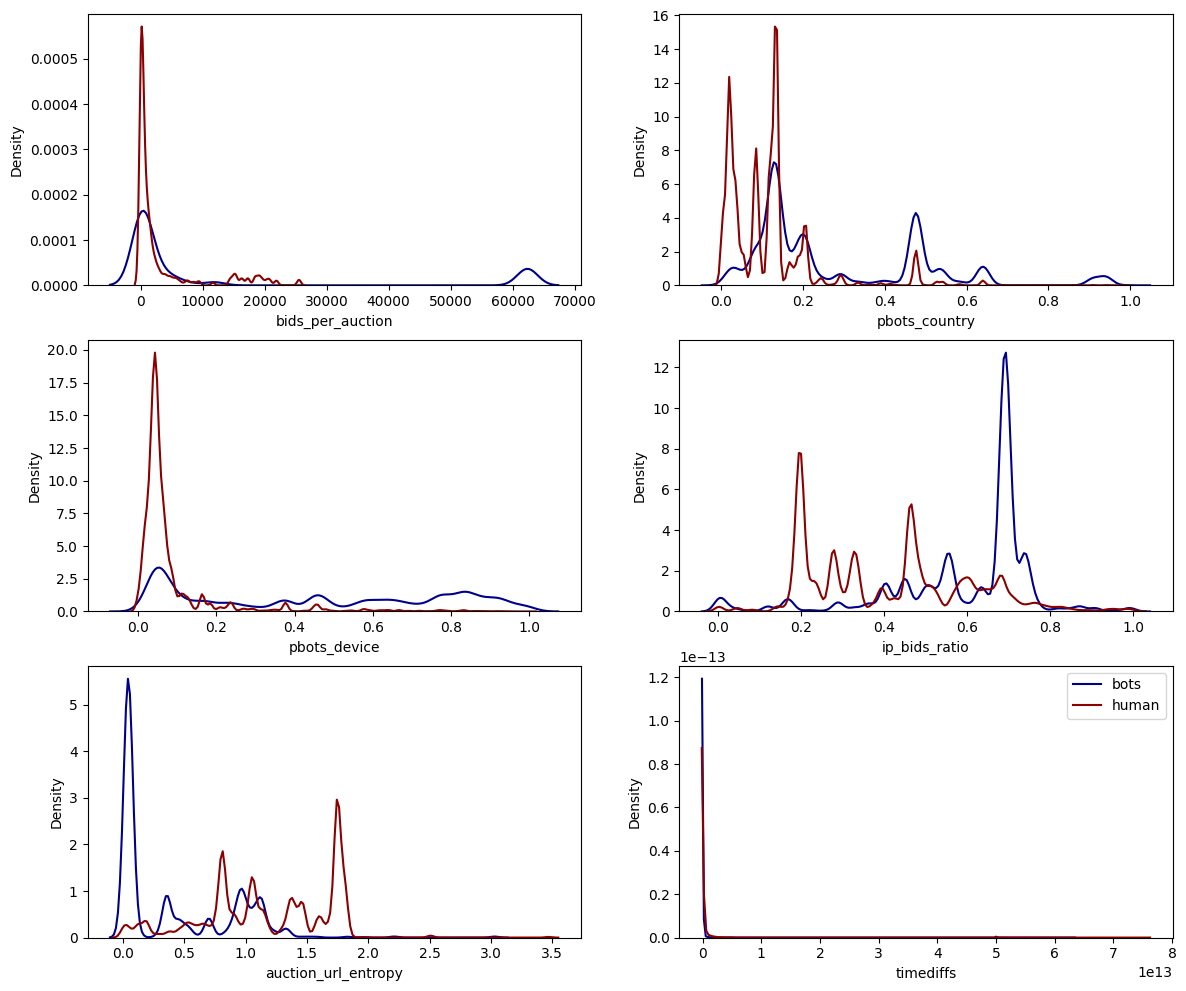

In [ ]:
bots = bid.loc[bid.outcome == 1]
human = bid.loc[bid.outcome == 0]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

sns.distplot(bots['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkblue', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkred', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

sns.distplot(bots['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

sns.distplot(bots['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(human['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
plt.legend(['bots', 'human'])
plt.show()

Étant donné que la variable `timediff` (différence de temps par utilisateur) a montré une distribution similaire entre les robots et les humains. Elle n'a également aucune corrélation claire avec notre résultat. Par conséquent, cette variable pourrait ne pas être très utile lors de l'ajustement d'un modèle. En revanche, nous pourrions même rencontrer des problèmes de surajustement si nous l'incorporons dans nos modèles. Ainsi, nous ignorerons la variable `timediff` pendant le processus de modélisation.

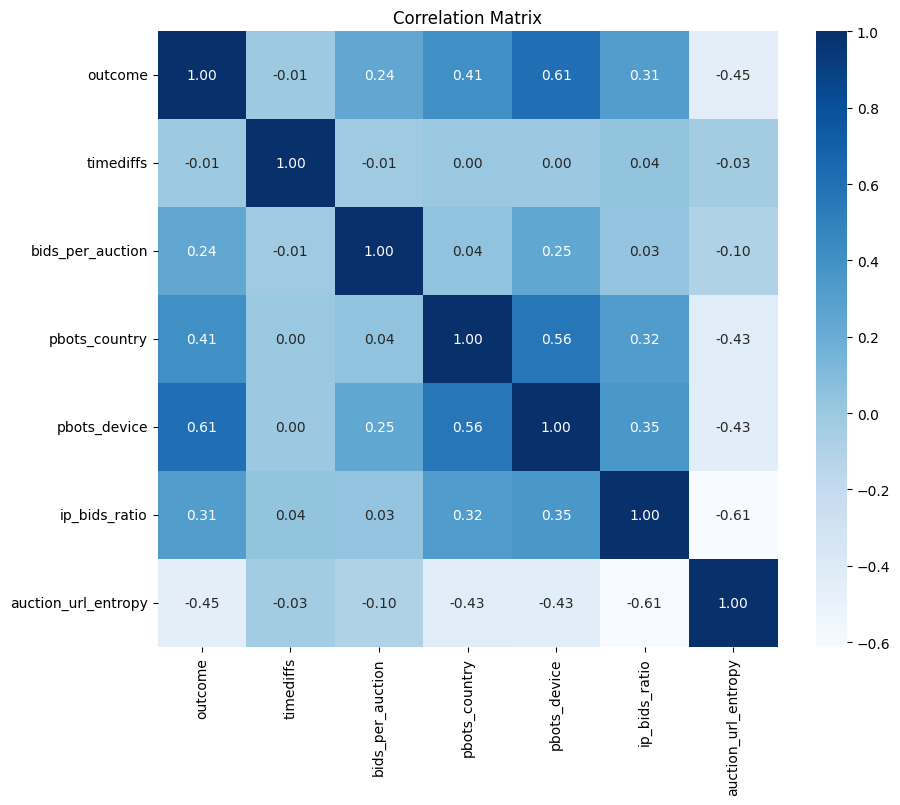

In [ ]:
# Plot the correlation matrix for the numerical values
corr_matrix = bid.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix,
            annot=True,  # Display the correlation values on the heatmap
            cmap="Blues",
            fmt=".2f")  # Format the values to two decimal places
plt.title('Correlation Matrix')
plt.show()

Ce graphique représente la matrice de corrélation de nos caractéristiques modifiées. Le bleu foncé dans cette représentation signifie que deux variables sont fortement positivement corrélées entre elles. La couleur blanche dans ce graphique indique que deux caractéristiques sont fortement négativement corrélées entre elles. À partir de ce graphique, nous pouvons déduire que la proportion de bots par appareil, la proportion de bots pour chaque pays et le rapport entre le nombre d'adresses IP uniques et le nombre d'enchères sont fortement corrélés positivement avec notre résultat. En revanche, la moyenne de l'entropie par URL d'enchère pour chaque utilisateur est fortement corrélée négativement avec notre résultat. Cependant, la variable du temps différencié par utilisateur ne montre pas clairement de corrélation avec notre résultat.

----
## 3. Process Imbalanced Data
----

### 3.1 Split Train and Test set

In [ ]:
bid_train, bid_test = train_test_split(bid, test_size=0.2)

### 3.2 Under sampling

Dans la partie de prétraitement des données, nous constatons que le ratio entre les enchérisseurs humains et les enchérisseurs robots est de 6,45. Par conséquent, nous devons effectuer une sous-échantillonnage des échantillons d'enchérisseurs humains dans l'ensemble d'entraînement afin de maintenir l'équilibre des données.

In [ ]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train, human_sample])

y_train = bid_train_balance['outcome']
X_train = bid_train_balance.iloc[:, -5:]
y_test = bid_test['outcome']
X_test = bid_test.iloc[:, -5:]

----
## 4 Modeling
----

## 4.1 Régression logistique

Voici ce qui se passe étape par étape :

1. **Initialisation du modèle de régression logistique** :
   - Un objet `LogisticRegression` est créé.

2. **Définition de la grille des hyperparamètres** :
   - Une grille des hyperparamètres est définie pour tester différentes combinaisons de valeurs des hyperparamètres du modèle de régression logistique.
   - Dans ce cas, les hyperparamètres à optimiser sont `C` (le paramètre de régularisation) et `penalty` (le type de régularisation).
   - Différentes valeurs sont spécifiées pour chaque hyperparamètre, telles que `[0.001, 0.01, 0.1, 1, 10, 100]` pour `C` et `['l1', 'l2']` pour `penalty`.

3. **Recherche des meilleurs hyperparamètres** :
   - La recherche des meilleurs hyperparamètres est effectuée à l'aide de la validation croisée (`GridSearchCV`), de la même manière que pour le modèle SVM.
   - L'objet `GridSearchCV` est initialisé avec le modèle de régression logistique, la grille des hyperparamètres et le nombre de plis de la validation croisée (`cv=5`).
   - La méthode `fit()` est ensuite appelée sur l'objet `GridSearchCV` avec les données d'entraînement (`X_train` et `y_train`) pour entraîner le modèle de régression logistique avec différentes combinaisons d'hyperparamètres.

4. **Affichage des meilleurs paramètres** :
   - Une fois la recherche des meilleurs hyperparamètres terminée, les meilleurs paramètres trouvés sont affichés à l'aide de l'attribut `best_params_` de l'objet `GridSearchCV`.
   - Cela permet d'obtenir les valeurs optimales des hyperparamètres pour le modèle de régression logistique, qui seront utilisées pour l'entraînement final du modèle.

In [ ]:
# Hyperparameter tuning for Logistic Regression
logistic = LogisticRegression()
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}
logistic_cv = GridSearchCV(estimator=logistic, param_grid=param_grid_logistic, cv=5, n_jobs=-1)
logistic_cv.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", logistic_cv.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}


l'intérêt du code suivant est de:

*   Mesurer le temps d'exécution pour évaluer l'efficacité du processus d'ajustement du modèle.
*   Ajuster le modèle avec les meilleurs hyperparamètres trouvés lors de la validation croisée permet d'obtenir un modèle optimisé, ce qui peut améliorer les performances de généralisation sur de nouvelles données.


In [ ]:
start_time = time.time()
# Fit the models
logistic_best = LogisticRegression(**logistic_cv.best_params_)
logistic_best.fit(X_train, y_train)

lr_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.432994842529297 seconds ---


Maintenant nous allons examiner l'importance de chaque feature et son impact sur la précision du modèle.

In [ ]:
# Logistic Regression
logistic_coef = logistic_best.coef_[0]  # Assuming logistic_best is the fitted logistic regression model
feature_names = X_train.columns  # Assuming X_train is your feature matrix
intercept = logistic_best.intercept_[0]  # Intercept term of logistic regression model

# Create a DataFrame to organize the metadata
logistic_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_coef
})

# Sort DataFrame by absolute coefficient values to identify important features
logistic_feature_importance['Absolute Coefficient'] = abs(logistic_feature_importance['Coefficient'])
logistic_feature_importance = logistic_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Logistic Regression Feature Importance:")
print(logistic_feature_importance)
print("Intercept:", intercept)

Logistic Regression Feature Importance:
               Feature  Coefficient  Absolute Coefficient
4  auction_url_entropy    -2.274486              2.274486
2         pbots_device     1.641399              1.641399
3        ip_bids_ratio     1.119584              1.119584
1        pbots_country     0.824006              0.824006
0     bids_per_auction     0.000002              0.000002
Intercept: 0.7582294813546409


Feature importance of Logistic Regression Model


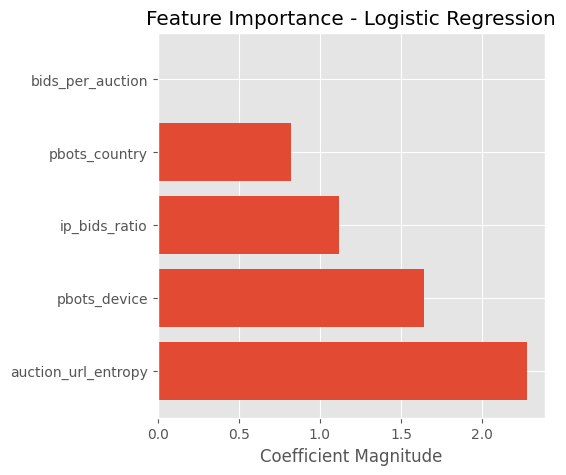

In [ ]:
# Plot feature importance for Logistic Regression
print('Feature importance of Logistic Regression Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = plt.barh(logistic_feature_importance['Feature'], logistic_feature_importance['Absolute Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance - Logistic Regression')
fig.savefig('LR_feature.png')

On constate donc que la caractéristique bids_per_auction n'apporte pas vraiment un intérêt pour le modèle de régression linéaire dans la catégorisation du bidder. On peut éventuellement laisser tomber cette feature pour le cas de la régression logistique.

### 4.1.1 Métrique d'évaluation

#### Accuracy

In [ ]:
# Predictions
y_lr_pred = logistic_best.predict(X_test)
print(f"logistic regression Accuracy: {accuracy_score(y_lr_pred, y_test):.3f}")

logistic regression Accuracy: 0.802


#### AUC

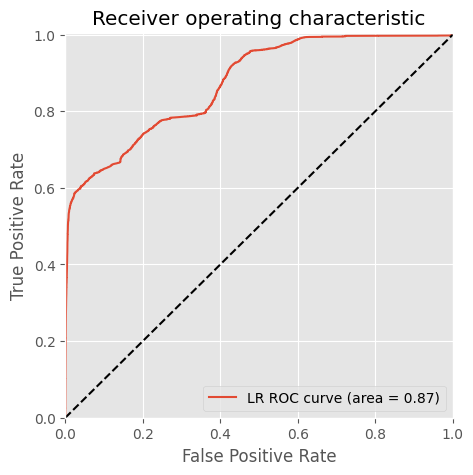

In [ ]:
# Plot ROC in one graph
y_lr_score = logistic_best.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _lr = roc_curve(y_test, y_lr_score)
roc_lr_auc = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='LR ROC curve (area = %0.2f)' % roc_lr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_lr_auc.png')

#### Precision & Recall

In [ ]:
print('Classification Report of Logistic Regression Model')
print(classification_report(y_test, y_lr_pred))

Classification Report of Logistic Regression Model
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88    531098
         1.0       0.38      0.72      0.50     82607

    accuracy                           0.80    613705
   macro avg       0.66      0.77      0.69    613705
weighted avg       0.87      0.80      0.83    613705



## 4.2 SVM

Initialement, nous avons adopté la fonction SVM Classifier de scikit-learn, mais son exécution devenait chronophage et rencontrait des plantages en raison des contraintes computationnelles dépassées. Pour remédier à cette situation, nous avons opté pour la fonction SGDClassifier, réputée pour sa capacité à traiter de grandes quantités de données. Cependant, nous avons été confrontés à un problème de convergence, où le modèle ne parvenait pas à converger en raison du dépassement du nombre maximal d'itérations défini par 'max_iter'. Même après avoir augmenté ce nombre, le problème de convergence persistait. Par conséquent, nous avons envisagé de réduire la taille de la base de données à une proportion qui permettrait au modèle de converger, soit 20% de la base de données totale. Pour estimer la durée nécessaire à l'entraînement, nous l'avons multipliée par cinq afin de prendre en compte le temps nécessaire pour parcourir l'ensemble de la base de données en cas de convergence sans problème. Cela nous permettrait également de comparer le temps d'entraînement avec celui des autres modèles à la fin.
Pour minimiser les erreurs pouvant survenir lors de la comparaison, étant donné qu'un modèle est uniquement entraîné sur 20% des données, nous avons opté pour un échantillonnage aléatoire et équitable. Cela signifie que le nombre de lignes avec la valeur d'outcome égale à 1 est égal au nombre de lignes avec la valeur d'outcome égale à 0.

In [ ]:
# Separate the dataset based on the outcome
data_outcome_1 = bid[bid['outcome'] == 1]
data_outcome_0 = bid[bid['outcome'] == 0]
data_outcome_0 = data_outcome_0.sample(n=len(data_outcome_1))


# Sample an equal number of data points for each outcome
sampled_data_outcome_1 = data_outcome_1.sample(len(data_outcome_1)//10, random_state=42)
sampled_data_outcome_0 = data_outcome_0.sample(len(data_outcome_1)//10, random_state=42)

# Combine the sampled data points
balanced_data = pd.concat([sampled_data_outcome_1, sampled_data_outcome_0])

# Optionally, shuffle the balanced dataset
bid_sample = balanced_data.sample(frac=1, random_state=42)

In [ ]:
bid_train, bid_test = train_test_split(bid_sample, test_size=0.2)

In [ ]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train, human_sample])

y_train_svm = bid_train_balance['outcome']
X_train_svm = bid_train_balance.iloc[:, -5:]

In [ ]:
# Hyperparameter tuning for SVM with SGD
svm_sgd = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
param_grid_svm_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'penalty': ['l2', 'l1', 'elasticnet'],  # Penalty term
}
svm_sgd_cv = GridSearchCV(estimator=svm_sgd, param_grid=param_grid_svm_sgd, cv=10)
svm_sgd_cv.fit(X_train_svm, y_train_svm)
print("Best parameters for SVM with SGD:", svm_sgd_cv.best_params_)

Best parameters for SVM with SGD: {'alpha': 0.0001, 'penalty': 'l1'}


De la même manière nous mesurons le temps d'exécution pour le prendre en considération dans futurs manipulations.
On a multiplier le temps d'execution par 5 car le modèle n'est entraîné que sur 20% de la base des données totale (comme ça on aura une valeur comparable avec les autres modèles)

In [ ]:
start_time = time.time()
# Fit the models
svm_best = SGDClassifier(**svm_sgd_cv.best_params_)
svm_best.fit(X_train_svm, y_train_svm)

svm_time = time.time() - start_time
print("--- %s seconds ---" % ((time.time() - start_time)*5))

--- 7.866089344024658 seconds ---


Maintenant nous allons examiner l'importance de chaque feature et son impact sur la précision du modèle.

In [ ]:
# Linear SVM
svm_coef = svm_best.coef_[0]  # Assuming svm_best is the fitted linear SVM model

# Create a DataFrame to organize the metadata
svm_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': svm_coef
})

# Sort DataFrame by absolute coefficient values to identify important features
svm_feature_importance['Absolute Coefficient'] = abs(svm_feature_importance['Coefficient'])
svm_feature_importance = svm_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Linear SVM Feature Importance:")
print(svm_feature_importance)

Linear SVM Feature Importance:
               Feature   Coefficient  Absolute Coefficient
4  auction_url_entropy -23809.744905          23809.744905
2         pbots_device   5133.187674           5133.187674
1        pbots_country   1832.942217           1832.942217
3        ip_bids_ratio     76.467098             76.467098
0     bids_per_auction     27.035177             27.035177


Feature importance of SVM Model


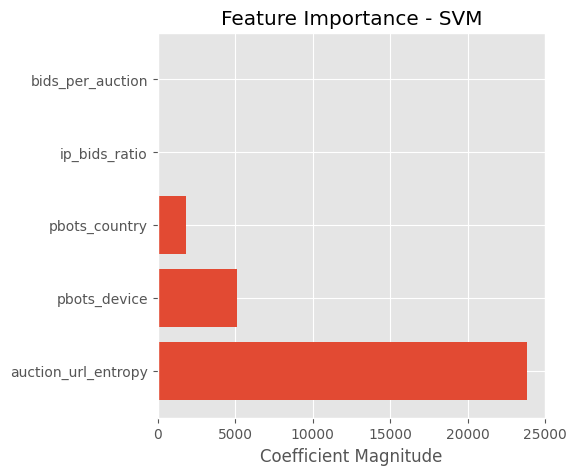

In [ ]:
# Plot feature importance for Logistic Regression
print('Feature importance of SVM Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = plt.barh(svm_feature_importance['Feature'], svm_feature_importance['Absolute Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance - SVM')
fig.savefig('SVM_feature.png')

### 4.2.1 Métrique d'évaluation

#### Accuracy

In [ ]:
# Predictions
y_svm_pred = svm_best.predict(X_test)
print(f"logistic regression Accuracy: {accuracy_score(y_svm_pred, y_test):.3f}")

logistic regression Accuracy: 0.632


#### AUC

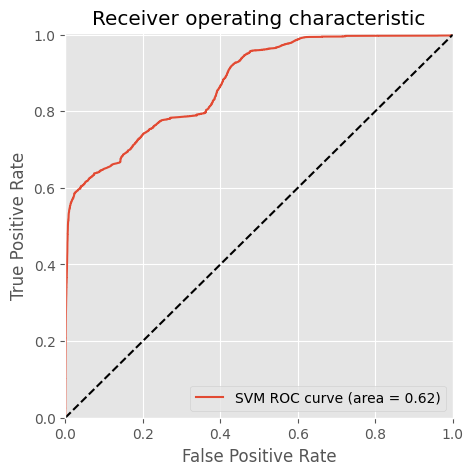

In [ ]:
# Plot ROC in one graph
y_svm_score = svm_best.decision_function(X_test)
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_svm_score)
roc_svm_auc = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='SVM ROC curve (area = %0.2f)' % roc_svm_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_svm_auc.png')

#### Precision & Recall

In [ ]:
print('Classification Report of SVM Model')
print(classification_report(y_test, y_svm_pred))

Classification Report of SVM Model
              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76    531098
         1.0       0.18      0.48      0.26     82607

    accuracy                           0.63    613705
   macro avg       0.53      0.57      0.51    613705
weighted avg       0.79      0.63      0.69    613705



## 4.3 Random Forest

Voici ce qui se passe étape par étape :

1. **Initialisation du modèle Random Forest** :
   - Un objet `RandomForestClassifier` est créé avec un nombre d'estimateurs fixé à 50.

2. **Définition de la grille des hyperparamètres** :
   - Une grille des hyperparamètres est définie pour tester différentes combinaisons de valeurs des hyperparamètres du modèle de forêt aléatoire.
   - Les hyperparamètres à optimiser sont `max_depth` (profondeur maximale de l'arbre), `max_leaf_nodes` (nombre maximal de feuilles) et `max_features` (nombre maximal de fonctionnalités à considérer lors de la recherche de la meilleure partition).
   - Différentes valeurs sont spécifiées pour chaque hyperparamètre, telles que `range(2, 8)` pour `max_depth`, `range(8, 12)` pour `max_leaf_nodes` et `['sqrt', 'auto', 'log2']` pour `max_features`.

3. **Recherche des meilleurs hyperparamètres** :
   - La recherche des meilleurs hyperparamètres est effectuée à l'aide de la validation croisée (`GridSearchCV`).
   - L'objet `GridSearchCV` est initialisé avec le modèle de forêt aléatoire, la grille des hyperparamètres et le nombre de plis de la validation croisée (`cv=5`).
   - La méthode `fit()` est ensuite appelée sur l'objet `GridSearchCV` avec les données d'entraînement (`X_train` et `y_train`) pour entraîner le modèle de forêt aléatoire avec différentes combinaisons d'hyperparamètres.

4. **Affichage des meilleurs paramètres** :
   - Une fois la recherche des meilleurs hyperparamètres terminée, les meilleurs paramètres trouvés sont affichés à l'aide de l'attribut `best_params_` de l'objet `GridSearchCV`.
   - Cela permet d'obtenir les valeurs optimales des hyperparamètres pour le modèle de forêt aléatoire, qui seront utilisées pour l'entraînement final du modèle.

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
param_grid = {
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 12),
    'max_features': ['sqrt', 'auto', 'log2']
}

rf_cv = GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

KeyboardInterrupt: 

***Remarque importante :***

Après plusieurs tentatives pour optimiser les hyperparamètres, nous avons identifié un défi majeur lié à la complexité de notre base de données et aux exigences logicielles. Le temps de traitement s'est avéré considérable, menant parfois au redémarrage forcé du kernel en raison de dépassements de mémoire.

Pour continuer notre travail de modélisation tout en restant dans les contraintes de nos ressources de calcul, nous avons opté pour une choix préfixé des hyperparamètres. Cette approche vise à réduire la charge sur le système tout en explorant l'espace des hyperparamètres de manière plus efficace, afin de pouvoir comparer par la suite les modèles.

In [ ]:
start_time = time.time()

rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                            max_leaf_nodes=11, max_features='log2',
                            bootstrap=True, oob_score=True)
rf.fit(X_train, y_train)

rf_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 87.5846357345581 seconds ---


Feature importance of Random Forest Model


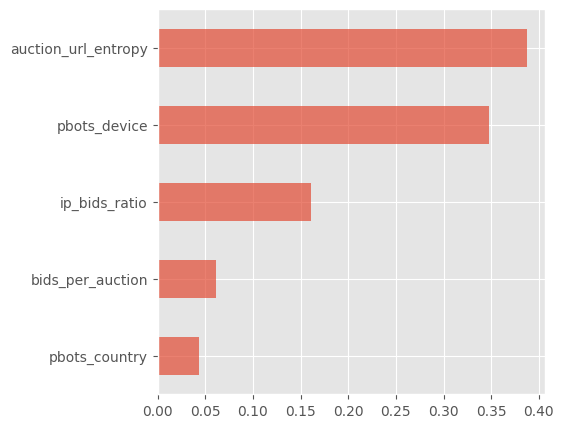

In [ ]:
# Check feature importance and display in bar plot.
print('Feature importance of Random Forest Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rf_feature.png')

### 4.3.1 Métrique d'évaluation

In [ ]:
y_rf_pred = rf.predict(X_test)

#### Accuracy

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")

Random Forest Accuracy: 0.918


#### AUC

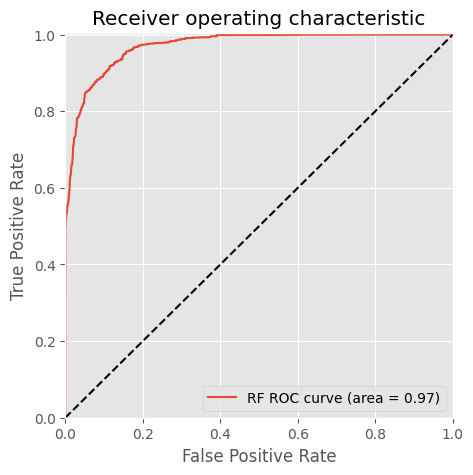

In [ ]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

#### Precision & Recall

In [ ]:
print('Classification Report of Random Forest Model')
print(classification_report(y_test, y_rf_pred))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95    531098
         1.0       0.64      0.87      0.74     82607

    accuracy                           0.92    613705
   macro avg       0.81      0.90      0.85    613705
weighted avg       0.93      0.92      0.92    613705



## 4.4 Arbre de décision

Voici ce qui se passe étape par étape :

1. **Initialisation du modèle d'arbre de décision** :
   - Un objet `DecisionTreeClassifier` est créé.

2. **Définition de la grille des hyperparamètres** :
   - Une grille des hyperparamètres est définie pour tester différentes combinaisons de valeurs des hyperparamètres du modèle d'arbre de décision.
   - Les hyperparamètres à optimiser sont `criterion` (critère de sélection de la meilleure division), `max_depth` (profondeur maximale de l'arbre), `max_leaf_nodes` (nombre maximal de feuilles) et `min_samples_split` (nombre minimal d'échantillons requis pour diviser un nœud).
   - Différentes valeurs sont spécifiées pour chaque hyperparamètre, telles que `['gini', 'entropy']` pour `criterion`, `range(2, 8)` pour `max_depth`, `range(10, 20)` pour `max_leaf_nodes` et `range(2, 8)` pour `min_samples_split`.

3. **Recherche des meilleurs hyperparamètres** :
   - La recherche des meilleurs hyperparamètres est effectuée à l'aide de la validation croisée (`GridSearchCV`).
   - L'objet `GridSearchCV` est initialisé avec le modèle d'arbre de décision, la grille des hyperparamètres et le nombre de plis de la validation croisée (`cv=5`).
   - La méthode `fit()` est ensuite appelée sur l'objet `GridSearchCV` avec les données d'entraînement (`X_train` et `y_train`) pour entraîner le modèle d'arbre de décision avec différentes combinaisons d'hyperparamètres.

4. **Affichage des meilleurs paramètres** :
   - Une fois la recherche des meilleurs hyperparamètres terminée, les meilleurs paramètres trouvés sont affichés à l'aide de l'attribut `best_params_` de l'objet `GridSearchCV`.
   - Cela permet d'obtenir les valeurs optimales des hyperparamètres pour le modèle d'arbre de décision, qui seront utilisées pour l'entraînement final du modèle.

In [ ]:
# hyperparameter tuning
dt = tree.DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 8),
    'max_leaf_nodes': range(10, 20),
    'min_samples_split': range(2, 8)
}

dt_cv = GridSearchCV(estimator=dt,
                     param_grid=param_grid,
                     cv=5)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)

KeyboardInterrupt: 

***Remarque importante :***

Après plusieurs tentatives pour optimiser les hyperparamètres, nous avons identifié un défi majeur lié à la complexité de notre base de données et aux exigences logicielles. Le temps de traitement s'est avéré considérable, menant parfois au redémarrage forcé du kernel en raison de dépassements de mémoire.

Pour continuer notre travail de modélisation tout en restant dans les contraintes de nos ressources de calcul, nous avons opté pour une choix préfixé des hyperparamètres. Cette approche vise à réduire la charge sur le système tout en explorant l'espace des hyperparamètres de manière plus efficace, afin de pouvoir comparer par la suite les modèles.

In [ ]:
# fit the model
# Decision Tree
start_time = time.time()
kwargs_regularize = dict(criterion='gini',
                         max_depth=5,
                         max_leaf_nodes=14,
                         min_samples_split=2)
dt = tree.DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)

dt_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.1544201374053955 seconds ---


### 4.4.1 Visualization de l'arbre

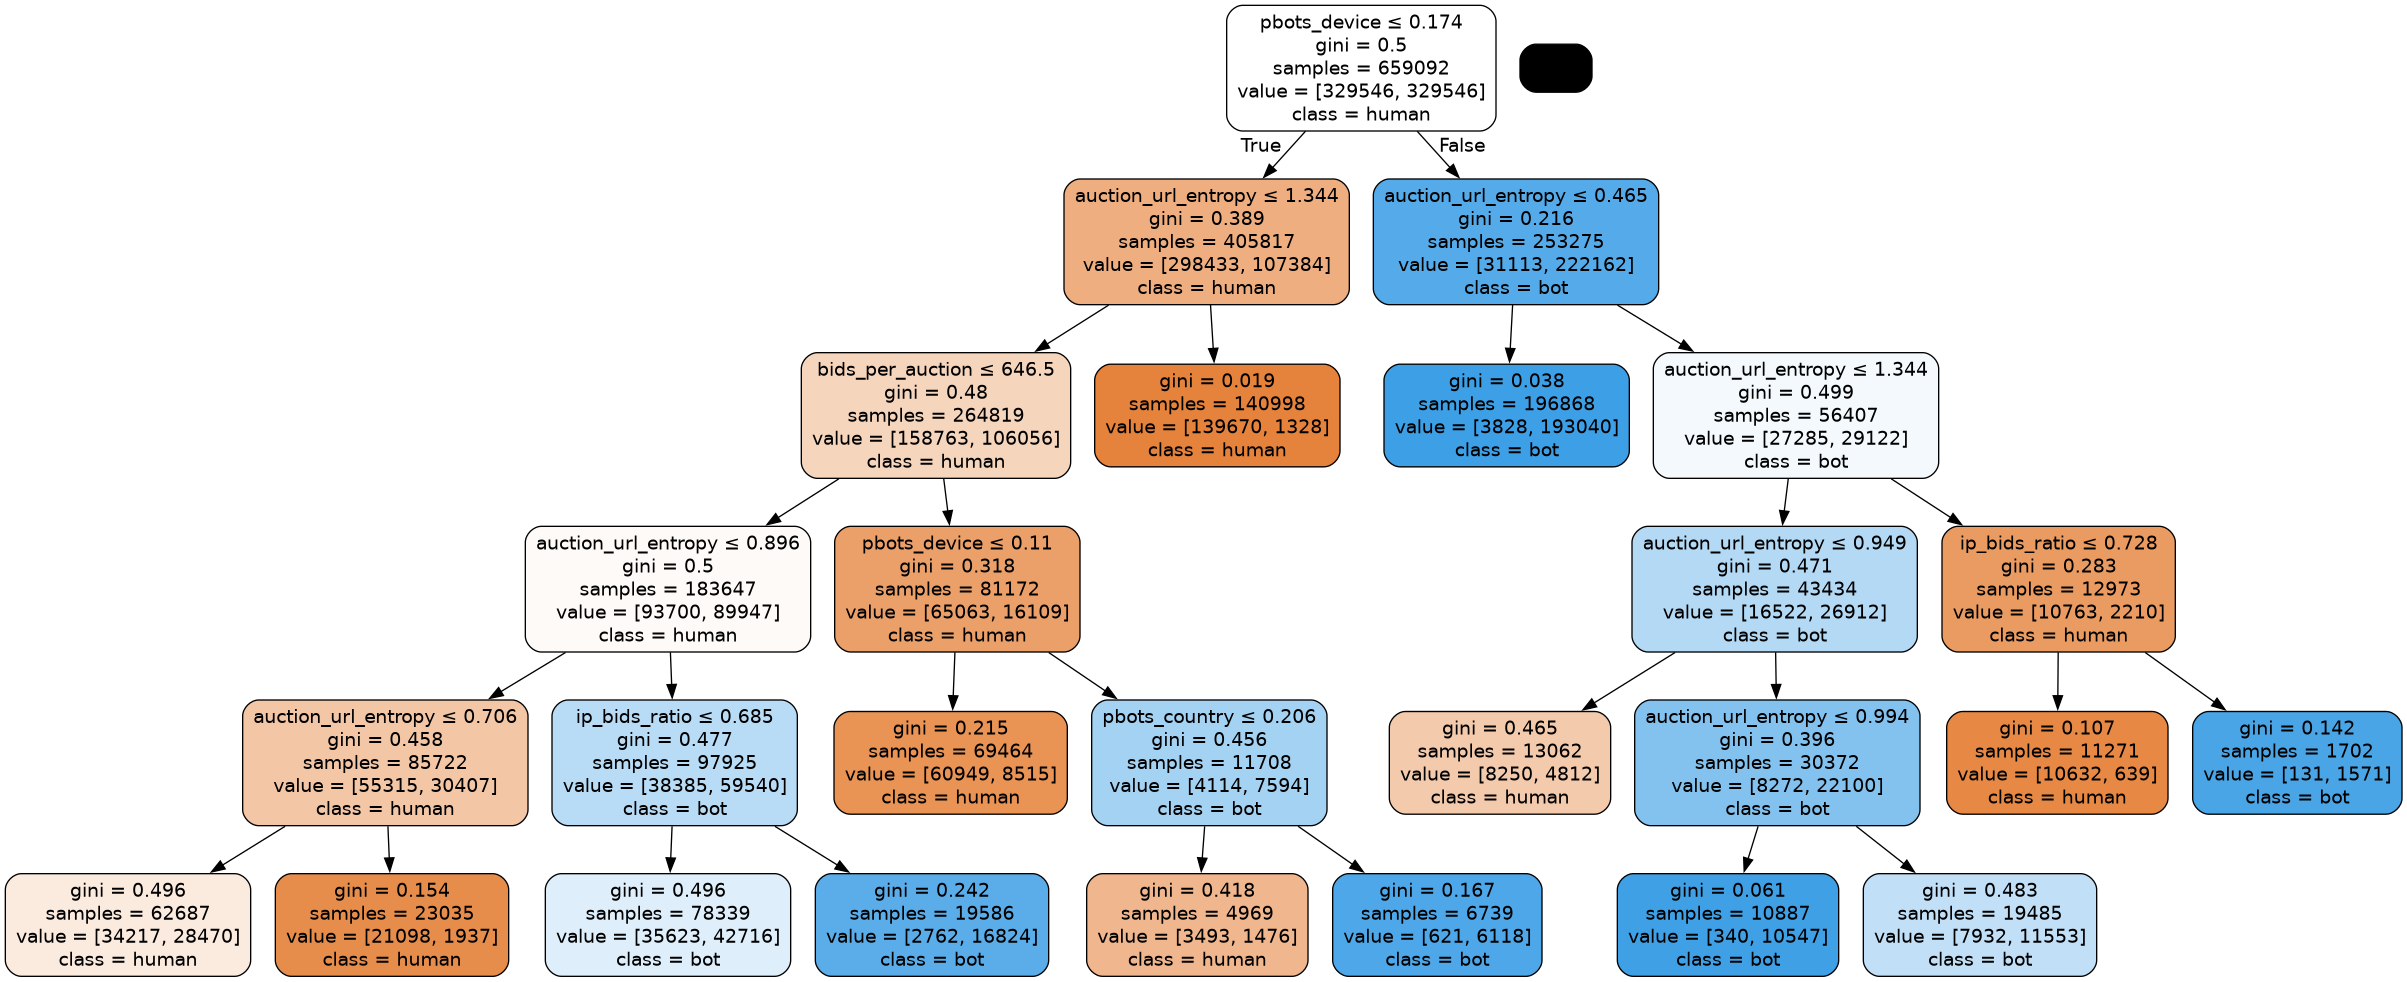

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                feature_names=X_train.columns.values,
                class_names=['human', 'bot'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Feature importance of Decision Tree Model


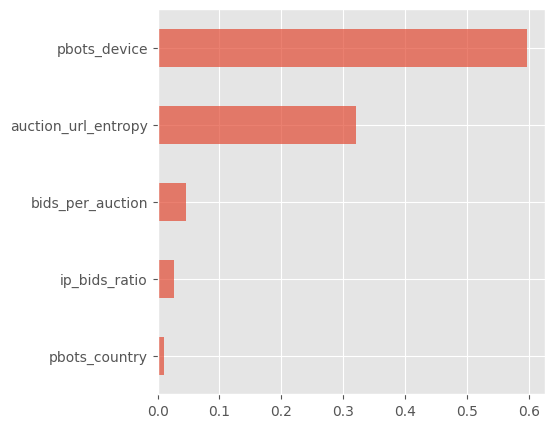

In [ ]:
# Check feature importance and display in bar plot.
print('Feature importance of Decision Tree Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('dt_feature.png')

### 4.4.1 Métrique d'évaluation

In [ ]:
# predict
y_dt_pred = dt.predict(X_test)

#### Accuracy

In [ ]:
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.846


#### AUC

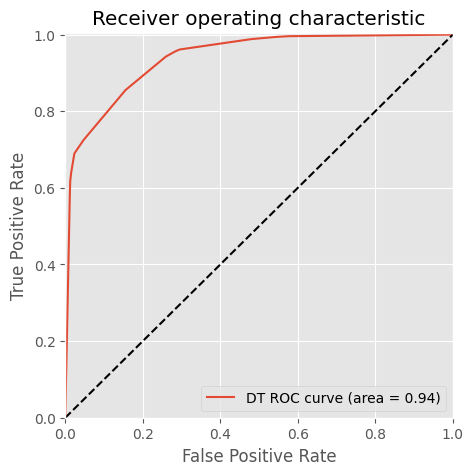

In [ ]:
# Plot ROC in one graph
y_dt_score = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

#### Precision & Recall

In [ ]:
print('Classification Report of Decision Tree Model')
print(classification_report(y_test, y_dt_pred))

Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90    531098
         1.0       0.46      0.86      0.60     82607

    accuracy                           0.85    613705
   macro avg       0.72      0.85      0.75    613705
weighted avg       0.91      0.85      0.86    613705



## 4.5 Gradient Boosting

Voici ce qui se passe étape par étape :

1. **Initialisation du modèle de Gradient Boosting** :
   - Un objet `GradientBoostingClassifier` est créé avec un nombre initial d'estimateurs (`n_estimators=10`).

2. **Définition de la grille des hyperparamètres** :
   - Une grille des hyperparamètres est définie pour tester différentes combinaisons de valeurs des hyperparamètres du modèle de Gradient Boosting.
   - Les hyperparamètres à optimiser sont `max_depth` (profondeur maximale de chaque arbre de décision dans le modèle) et `max_leaf_nodes` (nombre maximal de feuilles dans chaque arbre de décision).
   - Différentes valeurs sont spécifiées pour chaque hyperparamètre, telles que `range(2, 8)` pour `max_depth` et `range(8, 12)` pour `max_leaf_nodes`.

3. **Recherche des meilleurs hyperparamètres** :
   - La recherche des meilleurs hyperparamètres est effectuée à l'aide de la validation croisée (`GridSearchCV`).
   - L'objet `GridSearchCV` est initialisé avec le modèle de Gradient Boosting, la grille des hyperparamètres et le nombre de plis de la validation croisée (`cv=5`).
   - La méthode `fit()` est ensuite appelée sur l'objet `GridSearchCV` avec les données d'entraînement (`X_train` et `y_train`) pour entraîner le modèle de Gradient Boosting avec différentes combinaisons d'hyperparamètres.

4. **Affichage des meilleurs paramètres** :
   - Une fois la recherche des meilleurs hyperparamètres terminée, les meilleurs paramètres trouvés sont affichés à l'aide de l'attribut `best_params_` de l'objet `GridSearchCV`.
   - Cela permet d'obtenir les valeurs optimales des hyperparamètres pour le modèle de Gradient Boosting, qui seront utilisées pour l'entraînement final du modèle.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=10)
param_grid = {
    'max_depth': range(2, 8),
    'max_leaf_nodes': range(8, 12)
}

gb_cv = GridSearchCV(estimator=gb,
                     param_grid=param_grid,
                     cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

KeyboardInterrupt: 

***Remarque importante :***

Après plusieurs tentatives pour optimiser les hyperparamètres, nous avons identifié un défi majeur lié à la complexité de notre base de données et aux exigences logicielles. Le temps de traitement s'est avéré considérable, menant parfois au redémarrage forcé du kernel en raison de dépassements de mémoire.

Pour continuer notre travail de modélisation tout en restant dans les contraintes de nos ressources de calcul, nous avons opté pour une choix préfixé des hyperparamètres. Cette approche vise à réduire la charge sur le système tout en explorant l'espace des hyperparamètres de manière plus efficace, afin de pouvoir comparer par la suite les modèles.

In [ ]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, max_features='sqrt',
                                max_leaf_nodes=9)
gb.fit(X_train, y_train)

gb_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 55.63800930976868 seconds ---


Feature importance of Gradient Boosting Model


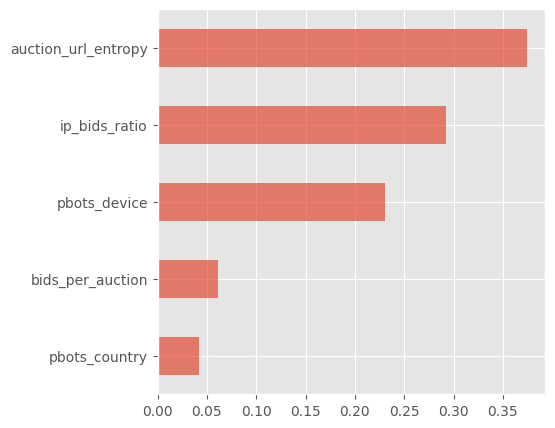

In [ ]:
# Check feature importance and display in bar plot.
print('Feature importance of Gradient Boosting Model')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('gb_feature.png')

### 4.5.1 Métrique d'évaluation

#### Accuracy

In [ ]:
y_gb_pred = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_gb_pred, y_test):.3f}")

Gradient Boosting Accuracy: 0.978


#### AUC

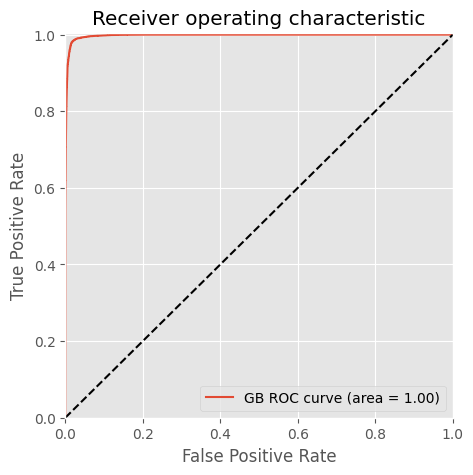

In [ ]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5, 5))
plt.plot(fpr_gb, tpr_gb, label='GB ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

#### Precison vs. Recall

In [ ]:
print('Classification Report of Gradient Boosting Model')
print(classification_report(y_test, y_gb_pred))

Classification Report of Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    531098
         1.0       0.87      0.99      0.92     82607

    accuracy                           0.98    613705
   macro avg       0.93      0.98      0.96    613705
weighted avg       0.98      0.98      0.98    613705



----
## 5 Comparaison des Différents Modèles
----

In [ ]:
dt_metrics = [metrics.accuracy_score(y_test, y_dt_pred), metrics.precision_score(y_test, y_dt_pred),
              metrics.recall_score(y_test, y_dt_pred), metrics.f1_score(
                  y_test, y_dt_pred),
              metrics.roc_auc_score(y_test, y_dt_pred), dt_time]
rf_metrics = [metrics.accuracy_score(y_test, y_rf_pred), metrics.precision_score(y_test, y_rf_pred),
              metrics.recall_score(y_test, y_rf_pred), metrics.f1_score(
                  y_test, y_rf_pred),
              metrics.roc_auc_score(y_test, y_rf_pred), rf_time]
gb_metrics = [metrics.accuracy_score(y_test, y_gb_pred), metrics.precision_score(y_test, y_gb_pred),
              metrics.recall_score(y_test, y_gb_pred), metrics.f1_score(
                  y_test, y_gb_pred),
              metrics.roc_auc_score(y_test, y_gb_pred), gb_time]
lr_metrics = [metrics.accuracy_score(y_test, y_lr_pred), metrics.precision_score(y_test, y_lr_pred),
              metrics.recall_score(y_test, y_lr_pred), metrics.f1_score(
                  y_test, y_lr_pred),
              metrics.roc_auc_score(y_test, y_lr_pred), lr_time]
svm_metrics = [metrics.accuracy_score(y_test, y_svm_pred), metrics.precision_score(y_test, y_svm_pred),
              metrics.recall_score(y_test, y_svm_pred), metrics.f1_score(
                  y_test, y_svm_pred),
              metrics.roc_auc_score(y_test, y_svm_pred), svm_time]

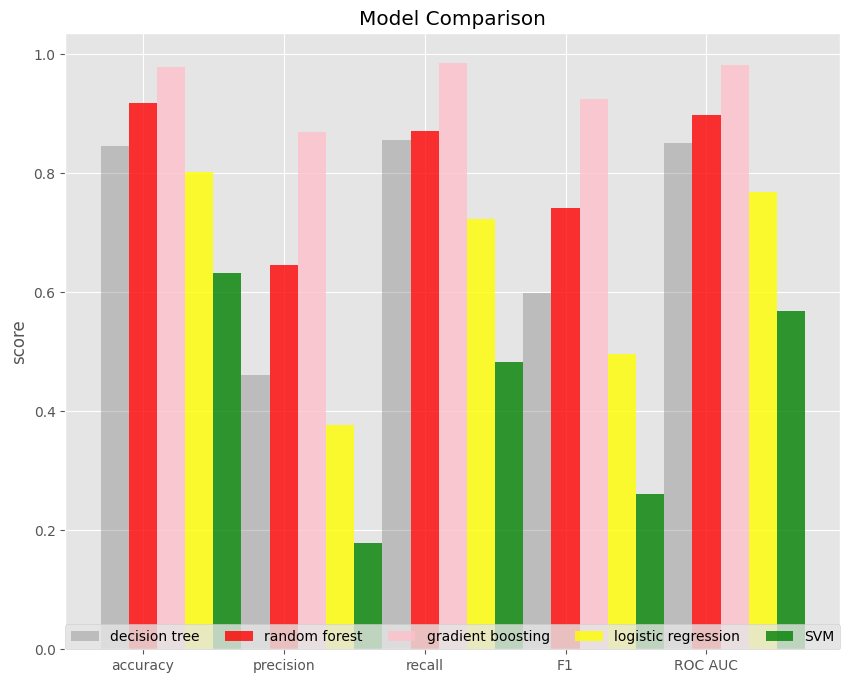

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(5)
width = 0.2
b1 = plt.bar(index, dt_metrics[0:5], width,
             alpha=0.4, color='grey', label='decision tree')
b2 = plt.bar(index+width, rf_metrics[0:5], width,
             alpha=0.8, color='red', label='random forest')
b3 = plt.bar(index+2*width, gb_metrics[0:5], width,
             alpha=0.8, color='pink', label='gradient boosting')
b4 = plt.bar(index+3*width, lr_metrics[0:5], width,
             alpha=0.8, color='yellow', label='logistic regression')
b5 = plt.bar(index+4*width, svm_metrics[0:5], width,
             alpha=0.8, color='green', label='SVM')
plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width, ('accuracy', 'precision', 'recall', 'F1', 'ROC AUC'))
plt.legend(loc=8, ncol=5, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')

In [ ]:
label = ["Accuracy_score", "Precision_score",
         "Recall_Score", "F1_score", "ROC_AUC_score", "Time(s)"]
table = pd.DataFrame({'Decision Tree': dt_metrics,
                      'Random Forest': rf_metrics,
                      'Gradient Boosting': gb_metrics,
                      'Logistic regression': lr_metrics,
                      'svm': svm_metrics})
table = table.transpose()
table.columns = label
table.transpose().round(3)

,Decision Tree,Random Forest,Gradient Boosting,Logistic regression,svm
Accuracy_score,0.846,0.918,0.978,0.802,0.632
Precision_score,0.461,0.645,0.869,0.377,0.179
Recall_Score,0.855,0.870,0.986,0.723,0.483
F1_score,0.599,0.741,0.924,0.496,0.261
ROC_AUC_score,0.850,0.898,0.981,0.769,0.569
Time(s),2.154,87.585,55.638,4.433,1.573


La comparaison des performances de différents modèles de machine learning présente dans révèle que le modèle de Gradient Boosting se distingue nettement par sa supériorité sur les autres modèles testés. Avec un score de précision de 0.869 et un score F1 de 0.924, il surpasse les autres modèles, indiquant une meilleure capacité à généraliser et à équilibrer la précision et le rappel. Bien que le temps d'entraînement soit légèrement plus long par rapport au modèle de Random Forest, cette différence est justifiée par des améliorations significatives dans tous les aspects de la performance.

De plus, le score AUC-ROC du Gradient Boosting est de 0.981, ce qui est proche de la perfection et suggère une excellente capacité du modèle à différencier les classes. Cela est particulièrement important dans les problèmes où la capacité de distinguer correctement entre les classes est cruciale.

En prenant en compte la rapidité acceptable et les performances supérieures en termes de précision, rappel, score F1 et AUC-ROC, le choix du modèle de Gradient Boosting comme modèle final est judicieux. Ce modèle représente un équilibre optimal entre temps d'entraînement et performance, ce qui est essentiel pour une application efficace et fiable dans des environnements de production.

Finalement, comme nous pouvons le voir, même si le temps d'ajustement de l'arbre de décision est assez rapide, cependant, ses performances ne sont pas acceptables. Le modèle de boosting de gradient a la meilleure performance et ne coûte pas autant de temps que le modèle de forêt aléatoire. Ainsi, nous choisissons le modèle de boosting de gradient comme notre modèle final.

----
## 6 Conclusion
----

D'après l'importance des caractéristiques, nous pouvons voir que dans les enchères en ligne, les êtres humains sont plus susceptibles de venir d'une URL aléatoire vers une certaine enchère, cependant, les robots sont plus susceptibles de venir de quelques URL spécifiques. Et comparés aux êtres humains, les robots sont plus susceptibles d'utiliser différentes adresses IP pour les enchères en ligne. Ainsi, si pour un utilisateur, il utilise plusieurs adresses IP et vient de quelques URL spécifiques, nous pourrions considérer qu'il s'agit d'un robot.